# Part 2 of IAU MESA hackathon: 
## the effect of winds

Summer 2024

This notebook contains the solutions to the plotting exercises of Part 2 of the MESA hackathon

In [2]:
# Imports
import numpy as np                  # Import numpy for numerical operations
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import mesa_reader as mr            # Import mesa_reader to read in history/profile files

from astropy import constants as const
import astropy.units as u


In [3]:
######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,25,26
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


# Central omega vs time

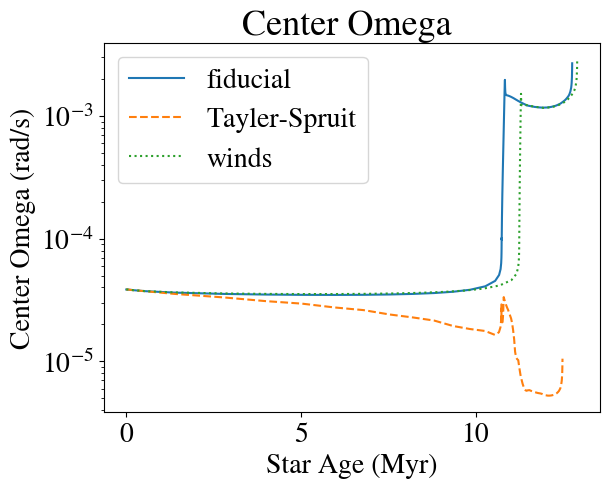

In [19]:
# Make a MesaData object for the history file
histdata = mr.MesaData('./rotating_star_proj/LOGS/history.data')
histdata_AM = mr.MesaData('./rotating_star_proj/LOGS_AM/history.data')
histdata_winds = mr.MesaData('./rotating_star_proj/LOGS_winds/history.data')

# # # # # # # # # # # # # # # 
plt.title('Center Omega ')
labels = ['fiducial', 'Tayler-Spruit', 'winds']
linstyles = ['-','--',':']
for i, hist in enumerate([histdata,histdata_AM,histdata_winds]):
    plt.plot(hist.star_age/1e6, hist.center_omega, label = labels[i], ls = linstyles[i]) 
                # c = hist.center_he4, cmap = 'viridis', vmin = 0, vmax =1)
# plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Center Omega (rad/s)')
plt.yscale('log')
plt.legend()
plt.show()



# Surface rotation vs. time

surface rot. at ZAMS =  [3.83857753e-05]
surface rot. at TAMS =  [2.86264367e-06]
surface rot. at core He exh. =  1.159699403973974e-09
surface rot. at ZAMS =  [3.83983622e-05]
surface rot. at TAMS =  [6.43747075e-06]
surface rot. at core He exh. =  1.610843210523422e-09
surface rot. at ZAMS =  [3.24535763e-05]
surface rot. at TAMS =  [2.75637698e-07]
surface rot. at core He exh. =  1.663812053041073e-09


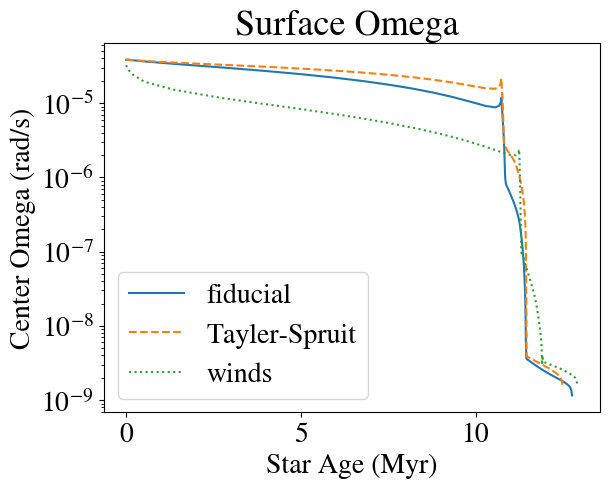

In [18]:
# # # # # # # # # # # # # # # 
plt.title('Surface Omega ')
labels = ['fiducial', 'Tayler-Spruit', 'winds']
linstyles = ['-','--',':']
for i, hist in enumerate([histdata,histdata_AM,histdata_winds]):
    print('surface rot. at ZAMS = ', hist.surf_avg_omega[hist.model_number == 1])
    print('surface rot. at TAMS = ', hist.surf_avg_omega[hist.model_number == 200])
    print('surface rot. at core He exh. = ', hist.surf_avg_omega[-1])
    plt.plot(hist.star_age/1e6, hist.surf_avg_omega, label = labels[i], ls = linstyles[i])   
                # c = hist.center_he4, cmap = 'viridis', vmin = 0, vmax =1)
# plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Center Omega (rad/s)')
plt.yscale('log')
plt.legend()
plt.show()



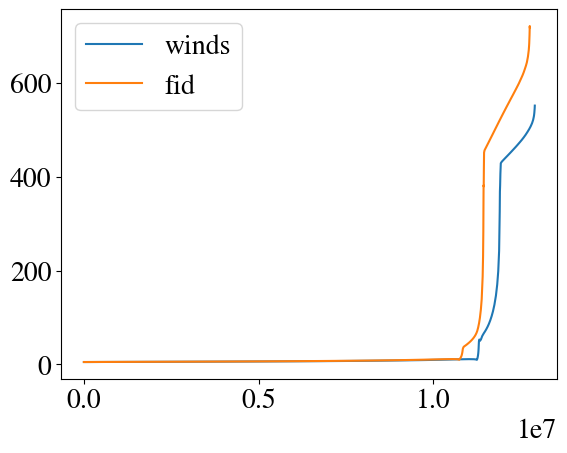

In [28]:
plt.plot(histdata_winds.star_age, histdata_winds.R, label = 'winds')
plt.plot(histdata.star_age, histdata.R, label = 'fid')
plt.legend()
plt.show()

# mass loss rate and mass vs time

We are going to plot the specific angular momentum (j) profile.

From [Task R.4](Day2_rotation.ipynb), we know that we want profile 1, 200, and 598 (the last one) to represent ZAMS, TAMS, and He exhaustion. 

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alpha', 'c_log_eps_burn_cno', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'surf_avg_j_rot', 'surf_avg_omega', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'log_rotational_mdot_boost', 'log_center_T', 'log_center_Rho', 'log_center_P', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_entropy', 'center_omega', 'center_omega_div_omega_crit', 'center_h1', 'ce

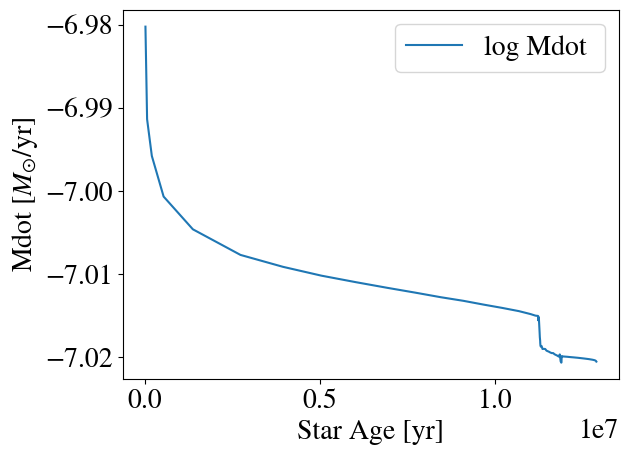

In [16]:
# Make a MesaData object for the history file
histdata_winds = mr.MesaData('./rotating_star_proj/LOGS_winds/history.data')
print(histdata_winds.bulk_names)

plt.plot(histdata_winds.star_age, histdata_winds.log_abs_mdot, label='log Mdot ')

# Plotvalues
plt.xlabel('Star Age [yr]') 
plt.ylabel('Mdot [$M_{\odot}$/yr]')
plt.legend()
plt.show()

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alpha', 'c_log_eps_burn_cno', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'surf_avg_j_rot', 'surf_avg_omega', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'log_rotational_mdot_boost', 'log_center_T', 'log_center_Rho', 'log_center_P', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_entropy', 'center_omega', 'center_omega_div_omega_crit', 'center_h1', 'ce

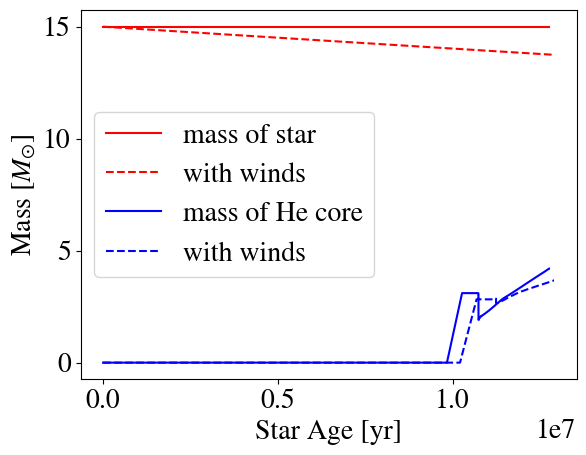

In [30]:
# Make a MesaData object for the history file
histdata = mr.MesaData('./rotating_star_proj/LOGS/history.data')
histdata_AM = mr.MesaData('./rotating_star_proj/LOGS_AM/history.data')
histdata_winds = mr.MesaData('./rotating_star_proj/LOGS_winds/history.data')
print(histdata_winds.bulk_names)

plt.plot(histdata.star_age, histdata.star_mass, label='mass of star', c = 'r')
plt.plot(histdata_winds.star_age, histdata_winds.star_mass, label='with winds', c = 'r', ls = '--')

plt.plot(histdata.star_age, histdata.he_core_mass, label='mass of He core', c = 'b')
plt.plot(histdata_winds.star_age, histdata_winds.he_core_mass, label='with winds', c = 'b', ls = '--')

# Plotvalues
plt.xlabel('Star Age [yr]') 
plt.ylabel('Mass [$M_{\odot}$]')
plt.legend()
plt.show()

In [9]:
print('age fid model at TAMS', histdata.star_age[histdata.model_number == 200])
print('age wind model at TAMS', histdata_winds.star_age[histdata_winds.model_number == 200])

age fid model at TAMS [10810463.15389546]
age wind model at TAMS [11288177.68653374]


# specific angular momentum profile

In [41]:
########################################
# For the fiducial model
########################################
logs = mr.MesaLogDir('rotating_star_proj/LOGS')
profile_ZAMS        = logs.profile_data(model_number=1)
profile_TAMS        = logs.profile_data(model_number=200)
profile_He_exhaust   = logs.profile_data()# Loads last profile


########################################
# For the Tayler-Spruit dynamo model  
########################################
logs_AM = mr.MesaLogDir('rotating_star_proj/LOGS_AM')
profile_ZAMS_AM         = logs_AM.profile_data(model_number=1)
profile_TAMS_AM         = logs_AM.profile_data(model_number=200)
profile_He_exhaust_AM   = logs_AM.profile_data()# Loads last profile

########################################
# For the winds model 
########################################
logs = mr.MesaLogDir('rotating_star_proj/LOGS_winds')
profile_ZAMS_winds        = logs.profile_data(model_number=1)
profile_TAMS_winds        = logs.profile_data(model_number=200)
profile_He_exhaust_winds   = logs.profile_data()# Loads last profile


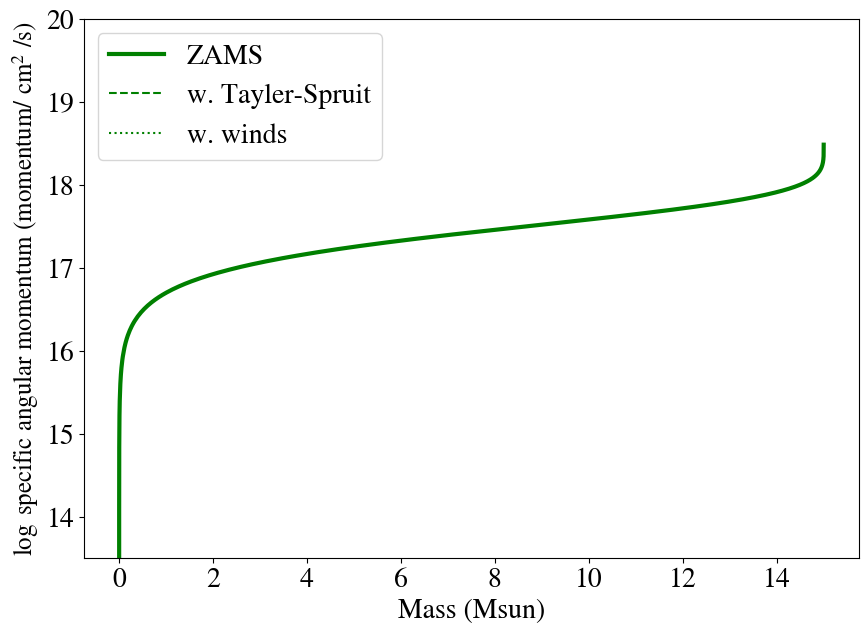

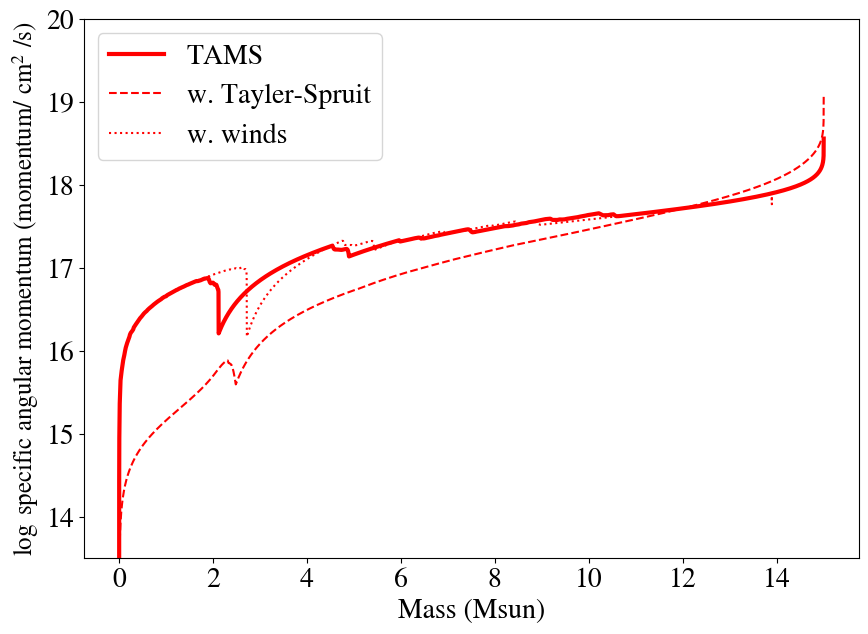

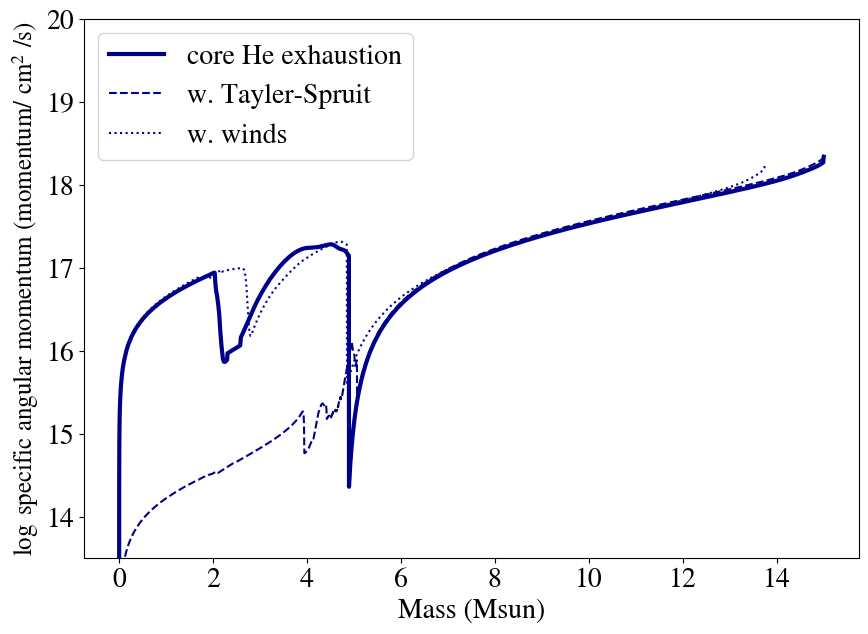

In [42]:

########################################
# ZAMS
########################################
fig, ax = plt.subplots(figsize = (10,7))

plt.plot(profile_ZAMS.mass, profile_ZAMS.log_j_rot, label = 'ZAMS', color = 'green', lw = 3)
plt.plot(profile_ZAMS_AM.mass, profile_ZAMS_AM.log_j_rot, label = 'w. Tayler-Spruit', color = 'green', ls = '--')
plt.plot(profile_ZAMS_winds.mass, profile_ZAMS_winds.log_j_rot, label = 'w. winds', color = 'green', ls = ':')

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.ylim(13.5, 20)
plt.legend()
plt.savefig('j_rot_ZAMS.png', bbox_inches = 'tight')
plt.show()



########################################
# TAMS
########################################
fig, ax = plt.subplots(figsize = (10,7))

# TAMS
plt.plot(profile_TAMS.mass, profile_TAMS.log_j_rot, label = 'TAMS', color = 'red', lw = 3)
plt.plot(profile_TAMS_AM.mass, profile_TAMS_AM.log_j_rot, label = 'w. Tayler-Spruit', color = 'red',  ls = '--')
plt.plot(profile_TAMS_winds.mass, profile_TAMS_winds.log_j_rot, label = 'w. winds', color = 'red',  ls = ':')

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.ylim(13.5, 20)
plt.legend()
plt.savefig('j_rot_TAMS.png', bbox_inches = 'tight')
plt.show()


########################################
# Core He exhaustion
########################################
fig, ax = plt.subplots(figsize = (10,7))

# core He exhaustion
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.log_j_rot, label = 'core He exhaustion', color = 'darkblue', lw = 3)
plt.plot(profile_He_exhaust_AM.mass, profile_He_exhaust_AM.log_j_rot, label = 'w. Tayler-Spruit', color = 'darkblue', ls = '--')
plt.plot(profile_He_exhaust_winds.mass, profile_He_exhaust_winds.log_j_rot, label = 'w. winds', color = 'darkblue', ls = ':')

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.ylim(13.5, 20)
plt.legend()
plt.savefig('j_rot_coreHeexhaust.png', bbox_inches = 'tight')
plt.show()


In [36]:
print(profile_TAMS_winds.star_age/ profile_TAMS.star_age) 

1.04419001534325


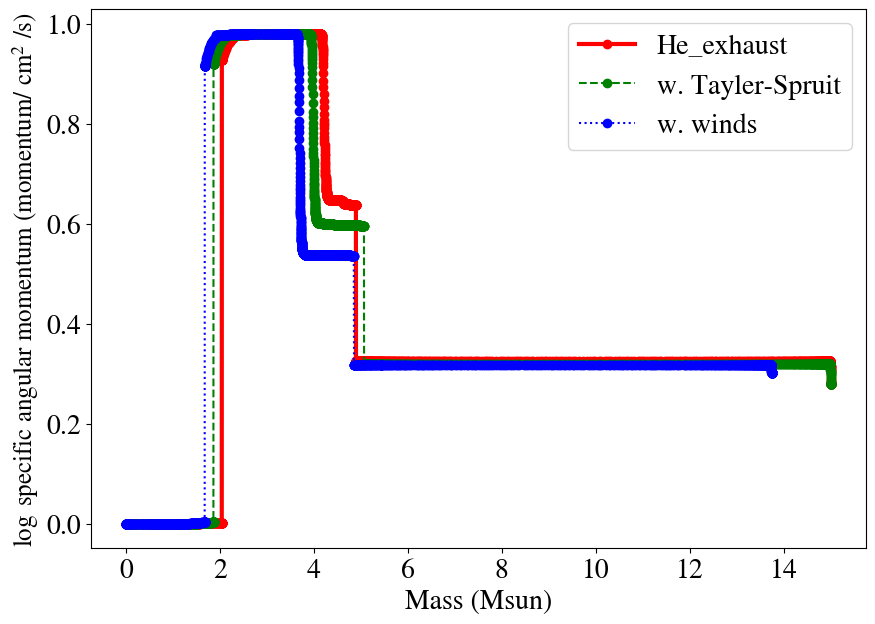

In [45]:
########################################
# He_exhaust
########################################
fig, ax = plt.subplots(figsize = (10,7))

# He_exhaust
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.he4, label = 'He_exhaust', color = 'red', lw = 3, marker = 'o')
plt.plot(profile_He_exhaust_AM.mass, profile_He_exhaust_AM.he4, label = 'w. Tayler-Spruit', color = 'g',  ls = '--', marker = 'o')
plt.plot(profile_He_exhaust_winds.mass, profile_He_exhaust_winds.he4, label = 'w. winds', color = 'b',  ls = ':', marker = 'o')

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.legend()
# plt.savefig('j_rot_He_exhaust.png', bbox_inches = 'tight')
plt.show()



# omega profile

('zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'temperature', 'entropy', 'pressure', 'logPgas', 'pgas_div_ptotal', 'eta', 'mu', 'grada', 'free_e', 'csound', 'v_div_csound', 'eps_grav', 'eps_nuc', 'non_nuc_neu', 'pp', 'cno', 'tri_alpha', 'c_alpha', 'n_alpha', 'o_alpha', 'ne_alpha', 'na_alpha', 'mg_alpha', 'si_alpha', 's_alpha', 'ar_alpha', 'ca_alpha', 'ti_alpha', 'cr_alpha', 'fe_co_ni', 'c12_c12', 'c12_o16', 'o16_o16', 'pnhe4', 'photo', 'ni56_co56', 'co56_fe56', 'other', 'abar', 'ye', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'log_opacity', 'luminosity', 'logL', 'total_energy', 'mlt_mixing_length', 'mlt_mixing_type', 'log_conv_vel', 'gradT', 'gradr', 'grad_temperature', 'grad_density', 'gradL', 'sch_stable', 'ledoux_stable', 'gradT_sub_grada', 'conv_vel_div_csound', 'log_mlt_D_mix', 'gradr_sub_grada',

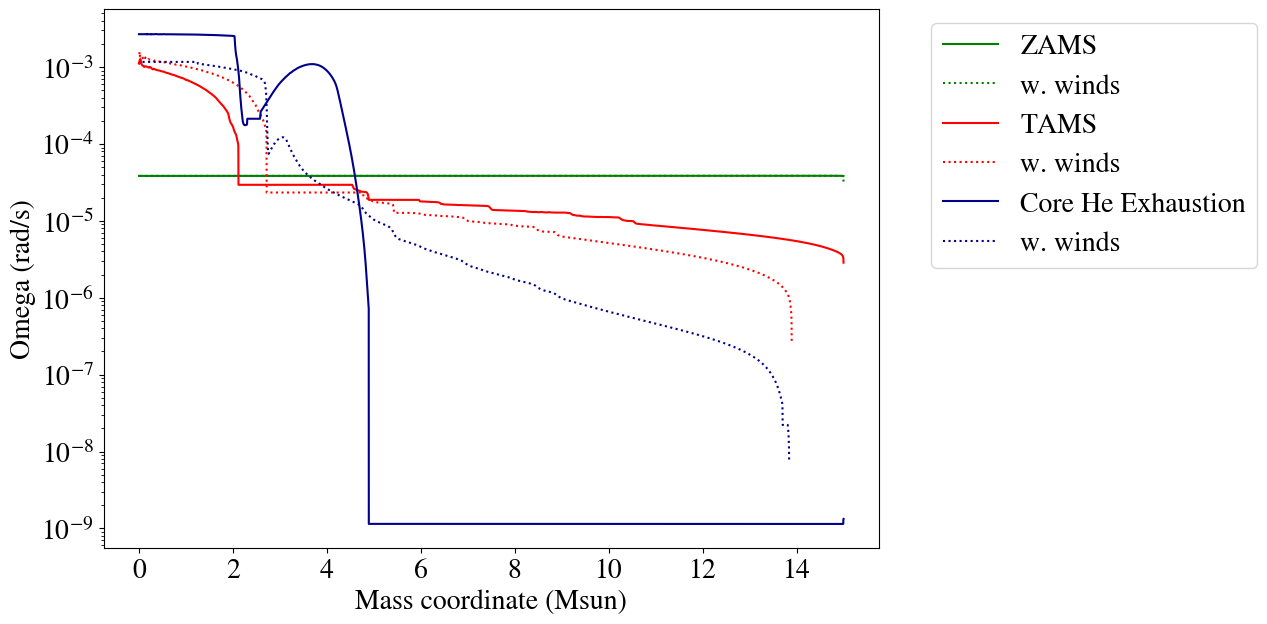

In [20]:
print(profile_ZAMS.bulk_names)
# print(profile_ZAMS.header_names)

fig, ax = plt.subplots(figsize = (10,7))

plt.plot(profile_ZAMS.mass, profile_ZAMS.omega, color = 'green', label = 'ZAMS')
# plt.plot(profile_ZAMS_AM.mass, profile_ZAMS_AM.omega, color = 'green', ls = '--', label = 'w. Tayler-Spruit')
plt.plot(profile_ZAMS_winds.mass, profile_ZAMS_winds.omega, color = 'green', ls = ":", label = 'w. winds')

plt.plot(profile_TAMS.mass, profile_TAMS.omega, color = 'red', label = 'TAMS')
# plt.plot(profile_TAMS_AM.mass, profile_TAMS_AM.omega, color = 'red', ls = '--', label = 'w. Tayler-Spruit')
plt.plot(profile_TAMS_winds.mass, profile_TAMS_winds.omega, color = 'red', ls = ":", label = 'w. winds')

plt.plot(profile_He_exhaust.mass, profile_He_exhaust.omega, color = 'darkblue', label = 'Core He Exhaustion')
# plt.plot(profile_He_exhaust_AM.mass, profile_He_exhaust_AM.omega, color = 'darkblue', ls = '--', label = 'w. Tayler-Spruit')
plt.plot(profile_He_exhaust_winds.mass, profile_He_exhaust_winds.omega, color = 'darkblue', ls = ":", label = 'w. winds')

# Plot values
plt.xlabel('Mass coordinate (Msun)')
plt.ylabel('Omega (rad/s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
# plt.savefig('omega_profile.png', bbox_inches = 'tight')
plt.show()

